# Mounting Google Drive

In [ ]:
##### Importing data via Google Drive mount
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


# Loading Train, Val, and Test Data Using Keras ImageDataGenerator

In [ ]:
# Directory Paths
#train_dir = "/gdrive/My Drive/newCircleData/Train/"
#val_dir = "/gdrive/My Drive/newCircleData/Val/"
test_dir = "/gdrive/My Drive/newCircleData/Test/" #"/gdrive/My Drive/mapsRedCap_DCH/fullReports/" 
train_data_dir = "/gdrive/My Drive/newCircleData/TrainValTest/"

import numpy as np 
import tensorflow as tf
# from numpy.random import seed
# tf.random.set_seed(seed(2))

#Image dims and training details
img_width = 448
img_height = 448
batch_size = 1
channels = 3
epochs = 50
#nb_train_samples = 395
#nb_valid_samples = 145
nb_test_samples = 197

#Keras ImageDataGenerator for loading train, val, and test data
from keras.preprocessing.image import ImageDataGenerator

#train_datagen = ImageDataGenerator(rescale=1./255)             
#valid_datagen = ImageDataGenerator(rescale=1./255)    
test_datagen = ImageDataGenerator(rescale=1./255) 

train_datagen = ImageDataGenerator(rescale=1./255,
    #shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    save_to_dir='/gdrive/My Drive/augmentedInceptionTrain/',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    save_to_dir='/gdrive/My Drive/augmentedInceptionVal/',
    subset='validation') # set as validation data

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)

label_map = train_generator.class_indices
print(label_map)

filenames = test_generator.filenames 
print(filenames)

Using TensorFlow backend.


Found 590 images belonging to 2 classes.
Found 147 images belonging to 2 classes.
Found 197 images belonging to 2 classes.
{'G': 0, 'S': 1}
['G/19088_RNFL_probability.png', 'G/19160_RNFL_probability.png', 'G/19196_RNFL_probability.png', 'G/19220_RNFL_probability.png', 'G/19268_RNFL_probability.png', 'G/19315_RNFL_probability.png', 'G/19361_RNFL_probability.png', 'G/19661_RNFL_probability.png', 'G/19796_RNFL_probability.png', 'G/19873_RNFL_probability.png', 'G/20068_RNFL_probability.png', 'G/20163_RNFL_probability.png', 'G/20265_RNFL_probability.png', 'G/20835_RNFL_probability.png', 'G/21163_RNFL_probability.png', 'G/21189_RNFL_probability.png', 'G/21618_RNFL_probability.png', 'G/21757_RNFL_probability.png', 'G/21917_RNFL_probability.png', 'G/23349_RNFL_probability.png', 'G/23596_RNFL_probability.png', 'G/23812_RNFL_probability.png', 'G/23835_RNFL_probability.png', 'G/24080_RNFL_probability.png', 'G/24215_RNFL_probability.png', 'G/24228_RNFL_probability.png', 'G/24501_RNFL_probability.p

In [ ]:
#Loading Pretrained ResNet Model and Fine Tuning/Transfer Learning on OCT Data
#import numpy as np 
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Model, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Softmax, Flatten, Dense, BatchNormalization 
from keras.metrics import categorical_accuracy
from keras import backend as K
from keras import regularizers
#import tensorflow as tf
from keras.models import Sequential

from keras import layers

from keras.callbacks import TensorBoard

#from keras.layers import Input, Dense
from keras import layers
from keras import optimizers
from keras.applications.inception_v3 import InceptionV3

# for tensorflow.keras
conv_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, channels), classes=2)

conv_base.summary()

87916544/87910968 [==============================] - 3s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 448, 448, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 223, 223, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 223, 223, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 223, 223, 32) 0           batch_normalization_1[0][0]      
______________________

In [ ]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    # if layer.name == 'stage4_unit2_conv1':
    #     set_trainable = True
    # if layer.name == 'stage4_unit2_bn2':
    #     set_trainable = True
    #if layer.name == 'mixed9_1':
    #     set_trainable = True
    #if layer.name == 'concatenate_2':
    #    set_trainable = True
    #if layer.name == 'activation_94':
    #    set_trainable = True
    #if layer.name == 'mixed_10':
    #    set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
#model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

#from keras.callbacks import TensorBoard, Callback, EarlyStopping

# class MetricsCheckpoint(Callback):
#     """Callback that saves metrics after each epoch"""
#     def __init__(self, savepath):
#         super(MetricsCheckpoint, self).__init__()
#         self.savepath = savepath
#         self.history = {}
#     def on_epoch_end(self, epoch, logs=None):
#         for k, v in logs.items():
#             self.history.setdefault(k, []).append(v)
#         np.save(self.savepath, self.history)
          
# callbacks_list = [EarlyStopping(monitor='val_acc', patience=8, verbose=1)]

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)#,
      #callbacks=callbacks_list+[MetricsCheckpoint('logs')])

Epoch 1/30


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 20 could not be retrieved. It could be because a worker has died.
  UserWarning)


 - 178s - loss: 1.4930 - acc: 0.7300 - val_loss: 0.1176 - val_acc: 0.7800
Epoch 2/30
 - 74s - loss: 0.7668 - acc: 0.8300 - val_loss: 1.9626 - val_acc: 0.7600
Epoch 3/30
 - 71s - loss: 0.8616 - acc: 0.8700 - val_loss: 6.8007e-08 - val_acc: 0.8400
Epoch 4/30
 - 55s - loss: 0.6701 - acc: 0.8800 - val_loss: 7.6596 - val_acc: 0.8400
Epoch 5/30
 - 57s - loss: 0.4413 - acc: 0.9100 - val_loss: 4.8910e-05 - val_acc: 0.8200
Epoch 6/30
 - 58s - loss: 0.8440 - acc: 0.9000 - val_loss: 6.9947e-06 - val_acc: 0.9000
Epoch 7/30
 - 53s - loss: 0.1706 - acc: 0.9300 - val_loss: 0.2738 - val_acc: 0.7600
Epoch 8/30
 - 52s - loss: 0.6084 - acc: 0.9100 - val_loss: 7.8494e-04 - val_acc: 0.8600
Epoch 9/30
 - 53s - loss: 0.6609 - acc: 0.8900 - val_loss: 1.4819e-04 - val_acc: 0.7600
Epoch 10/30
 - 33s - loss: 0.3311 - acc: 0.9500 - val_loss: 3.3637e-07 - val_acc: 0.8400
Epoch 11/30
 - 33s - loss: 0.3750 - acc: 0.9200 - val_loss: 2.8345e-09 - val_acc: 0.9600
Epoch 12/30
 - 52s - loss: 0.1017 - acc: 0.9600 - val_lo

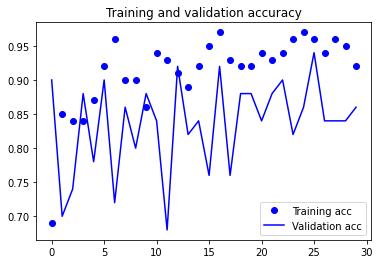

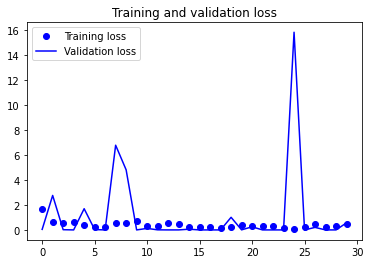

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False)

filenames = test_generator.filenames
print(filenames)
nb_samples = len(filenames)

percentCorrect = model.evaluate_generator(test_generator, steps = np.ceil(nb_samples / batch_size))
print(percentCorrect)

Found 197 images belonging to 2 classes.
['G/19088_RNFL_probability.png', 'G/19160_RNFL_probability.png', 'G/19196_RNFL_probability.png', 'G/19220_RNFL_probability.png', 'G/19268_RNFL_probability.png', 'G/19315_RNFL_probability.png', 'G/19361_RNFL_probability.png', 'G/19661_RNFL_probability.png', 'G/19796_RNFL_probability.png', 'G/19873_RNFL_probability.png', 'G/20068_RNFL_probability.png', 'G/20163_RNFL_probability.png', 'G/20265_RNFL_probability.png', 'G/20835_RNFL_probability.png', 'G/21163_RNFL_probability.png', 'G/21189_RNFL_probability.png', 'G/21618_RNFL_probability.png', 'G/21757_RNFL_probability.png', 'G/21917_RNFL_probability.png', 'G/23349_RNFL_probability.png', 'G/23596_RNFL_probability.png', 'G/23812_RNFL_probability.png', 'G/23835_RNFL_probability.png', 'G/24080_RNFL_probability.png', 'G/24215_RNFL_probability.png', 'G/24228_RNFL_probability.png', 'G/24501_RNFL_probability.png', 'G/24614_RNFL_probability.png', 'G/25208_RNFL_probability.png', 'G/25351_RNFL_probability.png'

In [ ]:
model.save('/gdrive/My Drive/inceptionV3TranferLearnDataAug061720.h5')